<a href="https://colab.research.google.com/github/PaulaRestrepo20/Mi-primer-Markdown/blob/main/Tarea_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from datetime import datetime
#!pip install tensorflow_datasets
#!pip install tensorflow-text
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
print(tf.__version__)

2.7.0


In [2]:
!pip install tensorflow-text

     |████████████████████████████████| 4.9 MB 14.2 MB/s 
     |████████████████████████████████| 497.5 MB 27 kB/s 
     |████████████████████████████████| 5.8 MB 49.8 MB/s 
     |████████████████████████████████| 462 kB 60.8 MB/s 
     |████████████████████████████████| 1.4 MB 2.5 MB/s 
     |████████████████████████████████| 15.7 MB 40.8 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.7.0
    Uninstalling tensorflow-2.7.0:
      Successfully uninstalled tensorflow-2.7.0
ERROR: pip's 

In [3]:
#descargue Fashion-MNIST
(ds_train, ds_validation, ds_test), ds_info = tfds.load(
    name = 'fashion_mnist',
    split=['train[:80%]', 'train[20%:]', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info= True)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteG3IDEV/fashion_mnist-train.tfrecord


  0%|          | 0/60000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteG3IDEV/fashion_mnist-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


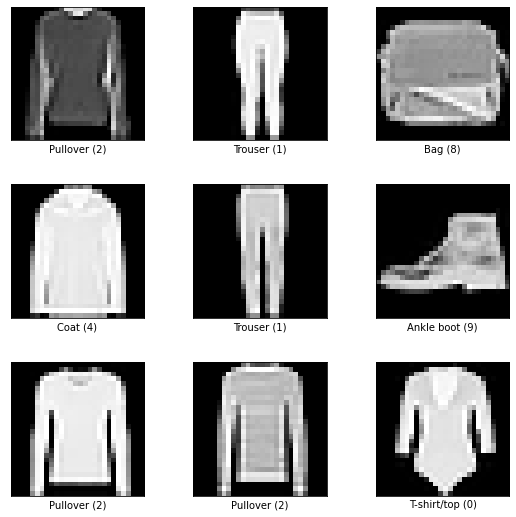

In [4]:
fig = tfds.show_examples(ds_train, ds_info)

In [5]:
#Rotulos y sus indices
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

In [6]:
## Preprocesamiento!!
def normalize_img(image,label ):
  image = tf.image.random_flip_left_right(image)
  image = tf.image.rot90(image)
  return tf.cast(image, tf.float32) / 255., tf.one_hot(label,depth=10)
  #retorne la imagen normalizada y con el prepocesamiento anterior, tambien el label en one_hot.


In [7]:
## Pipeline!!
def data_load(data_ds,augmented=normalize_img,shuffle_=True ,batch_=5):
    data_ds = data_ds.map(
        augmented, num_parallel_calls=tf.data.AUTOTUNE)
    data_ds = data_ds.cache()
    if shuffle_:
        data_ds = data_ds.shuffle(len(data_ds))
    data_ds = data_ds.batch(batch_)
    data_ds = data_ds.prefetch(tf.data.AUTOTUNE)
    return data_ds

In [8]:
BATCH=10
data_train = data_load(ds_train,batch_=BATCH)
data_test = data_load(ds_test, shuffle_=False, batch_=BATCH)
data_validation = data_load(ds_validation, shuffle_=False, batch_=BATCH)

(10, 28, 28, 1) tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]], shape=(10, 10), dtype=float32)
(10, 28, 28, 1) tf.Tensor(
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]], shape=(10, 10), dtype=float32)
(10, 28, 28, 1) tf.Tensor(
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.

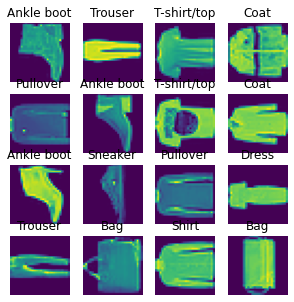

In [9]:
##imagenes de datos de entrenamiento 
plt.figure(figsize=(5, 5))
i=0
for ds,lb in data_train.take(16):
    print(ds.shape,lb)
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(ds[0,:,:,0].numpy())
    index = tf.argmax(lb, axis=1)
    plt.title('{}'.format(fashion_mnist_labels[index[0]]))
    plt.axis("off")
    i+=1

##Regresión Lineal

<function matplotlib.pyplot.legend>

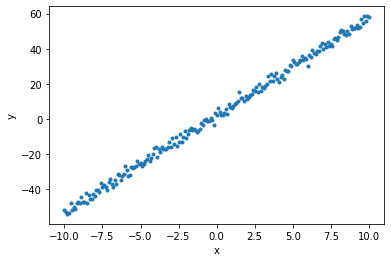

In [10]:
##Generacion de datos
x = tf.linspace(-10.0, 10.0, 200+1)
inter_true=tf.constant(2.3)
pendi_true=tf.constant(5.5)
noise = tf.random.normal(
    (201,), mean=0.0, stddev=1.9, dtype=tf.dtypes.float32)
y = pendi_true*x+inter_true+noise
plt.scatter(x,y,marker='.')
plt.xlabel('x')
plt.ylabel('y')
plt.legend

In [11]:
## Datos generados en Dataframe
dict_={'x':x,'y':y}
df =pd.DataFrame(dict_)
df.head()

,x,y
0,-10.0,-51.984066
1,-9.9,-52.921833
2,-9.8,-54.099918
3,-9.7,-53.428463
4,-9.6,-47.902691


In [12]:
## Uso de Gradient Descent para realizar la regresion lineal #https://en.wikipedia.org/wiki/Gradient_descent

def gradient_descent(df, init_pendiente, init_intercept, n_pasos=80, learning_rate=1e-3):
    
    #datos
    x, y = df['x'].values, df['y'].values
    
    #definicion de variables pendiente m y punto de corte b
    tf_pend = tf.Variable(init_pendiente, dtype='float32', name='m') 
    tf_inter = tf.Variable(init_intercept, dtype='float32', name='b') 
    loss_hist = []
    
    #iteraciones
    for _ in range(n_pasos):
        
        # funcion with tf.GradientTape() 
        with tf.GradientTape(watch_accessed_variables=False) as tape:

            tape.watch([tf_pend,tf_inter])

           
            predicc = tf_pend * x + tf_inter
            errors = predicc - y
            loss = tf.reduce_mean(errors**2)
   # evaluacion del gradiente dloss/dm (dl_dm) y dloss/db (dl_db)
        
        dl_dm,dl_db = tape.gradient(loss, [tf_pend,tf_inter])
        
        # gradient_descent algoritmo
        tf_pend = tf_pend - learning_rate * dl_dm
        tf_inter = tf_inter - learning_rate * dl_db 
             
        # generacion lista de valores de la funcion loss en cada iteracion
        loss_hist.append(loss.numpy())
        
        
    return tf_pend.numpy(), tf_inter.numpy(), loss_hist

In [13]:
m_pred, b_pred, loss_func = gradient_descent(df, 2., 2.)
print('Valor de la pendiente predicha: {}. Valor de la pendiente real: {}. \n'.format(m_pred,pendi_true.numpy()))
print('Valor del intercepto predicho: {}. Valor del intercepto real: {}. \n'.format(b_pred,inter_true.numpy()))

Valor de la pendiente predicha: 5.527359485626221. Valor de la pendiente real: 5.5. 

Valor del intercepto predicho: 2.029697895050049. Valor del intercepto real: 2.299999952316284. 



<function matplotlib.pyplot.legend>

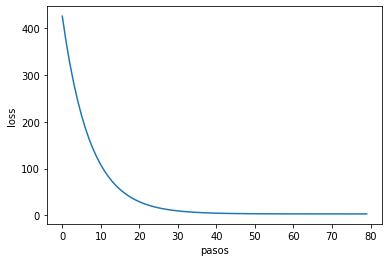

In [14]:
## Grafica del comportamiento de la funcion loss en cada iteracion
plt.plot(loss_func)
plt.xlabel('pasos')
plt.ylabel('loss')
plt.legend

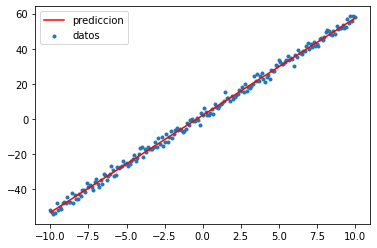

In [15]:
# Prediccion de la regresion!
plt.scatter(x,y,marker='.', label='datos')
plt.plot(x,x*m_pred+b_pred,color='red', label='prediccion')
plt.legend()

##Punto 3

In [16]:
(ds_train, ds_test), ds_info = tfds.load(
    name = 'titanic',
    split=['train[:70%]', 'train[30%:]'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/titanic/2.0.0.incompleteS5Z8BI/titanic-train.tfrecord


  0%|          | 0/1309 [00:00<?, ? examples/s]

Dataset titanic downloaded and prepared to /root/tensorflow_datasets/titanic/2.0.0. Subsequent calls will reuse this data.


In [17]:
df = tfds.as_dataframe(ds_train, ds_info)
df.head()

,features/age,features/boat,features/body,features/cabin,features/embarked,features/fare,features/home.dest,features/name,features/parch,features/pclass,features/sex,features/sibsp,features/ticket,survived
0,30.0,b'Unknown',-1,b'Unknown',2,13.0000,"b'Sarnia, ON'","b'McCrie, Mr. James Matthew'",0,1,0,0,b'233478',0
1,37.0,b'Unknown',98,b'Unknown',2,7.9250,"b'Ruotsinphytaa, Finland New York, NY'","b'Gustafsson, Mr. Anders Vilhelm'",0,2,0,2,b'3101276',0
2,28.0,b'9',-1,b'Unknown',2,13.0000,b'Spain',"b'Reynaldo, Ms. Encarnacion'",0,1,1,0,b'230434',1
3,18.0,b'Unknown',-1,b'Unknown',2,73.5000,"b'Lyndhurst, England'","b'Davies, Mr. Charles Henry'",0,1,0,0,b'S.O.C. 14879',0
4,-1.0,b'Unknown',-1,b'Unknown',0,7.8958,b'Unknown',"b'Gheorgheff, Mr. Stanio'",0,2,0,0,b'349254',0


In [18]:
df.dtypes

features/age          float32
features/boat          object
features/body           int32
features/cabin         object
features/embarked       int64
features/fare         float32
features/home.dest     object
features/name          object
features/parch          int32
features/pclass         int64
features/sex            int64
features/sibsp          int32
features/ticket        object
survived                int64
dtype: object

In [19]:
SHUFFLE_BUFFER = 500
BATCH_SIZE = 100

numeric_feature_names = ['features/age','features/body','features/embarked','features/fare','features/parch','features/pclass','features/sex','features/sibsp','survived']
numeric_features = df[numeric_feature_names]
numeric_features.head()

,features/age,features/body,features/embarked,features/fare,features/parch,features/pclass,features/sex,features/sibsp,survived
0,30.0,-1,2,13.0000,0,1,0,0,0
1,37.0,98,2,7.9250,0,2,0,2,0
2,28.0,-1,2,13.0000,0,1,1,0,1
3,18.0,-1,2,73.5000,0,1,0,0,0
4,-1.0,-1,0,7.8958,0,2,0,0,0


In [20]:
tf.convert_to_tensor(numeric_features)

<tf.Tensor: shape=(916, 9), dtype=float64, numpy=
array([[30., -1.,  2., ...,  0.,  0.,  0.],
       [37., 98.,  2., ...,  0.,  2.,  0.],
       [28., -1.,  2., ...,  1.,  0.,  1.],
       ...,
       [-1., -1.,  2., ...,  0.,  0.,  0.],
       [39., -1.,  2., ...,  1.,  0.,  1.],
       [32., -1.,  2., ...,  0.,  0.,  0.]])>

In [21]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(numeric_features)
dfnormal = normalizer(numeric_features)

In [22]:
print(dfnormal)

tf.Tensor(
[[ 0.34179792 -0.27645326  0.62559414 ... -0.72747177 -0.46911627
  -0.7593365 ]
 [ 0.7281373   1.4255078   0.62559414 ... -0.72747177  1.4197211
  -0.7593365 ]
 [ 0.23141524 -0.27645326  0.62559414 ...  1.3746237  -0.46911627
   1.3169392 ]
 ...
 [-1.3691337  -0.27645326  0.62559414 ... -0.72747177 -0.46911627
  -0.7593365 ]
 [ 0.83852    -0.27645326  0.62559414 ...  1.3746237  -0.46911627
   1.3169392 ]
 [ 0.4521806  -0.27645326  0.62559414 ... -0.72747177 -0.46911627
  -0.7593365 ]], shape=(916, 9), dtype=float32)


In [30]:
def df_to_dataset(dfnormal, shuffle=True, batch_size=100):
  dfnormal = dfnormal.copy()
  ds = tf.data.Dataset.from_tensor_slices((dict(dfnormal)))
  ds = ds.cache()
  if shuffle:
    ds = ds.shuffle(len(dfnormal))
    ds = ds.batch(batch_size)
    ds = ds.prefetch(tf.data.AUTOTUNE)
  return ds

batch_size = 100
train_ds = df_to_dataset(df, batch_size=batch_size)
test_ds = df_to_dataset(df, shuffle=False, batch_size=batch_size)